In [22]:
# from __future__ import print_function
# import time
# import numpy as np
# import pandas as pd
# # from sklearn.datasets import fetch_mldata
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# %matplotlib inline
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import seaborn as sns
# from matplotlib.colors import LogNorm
# import umap.umap_ as uma
# import math
# from collections import Counter

In [1]:
from plotting import *
from Execute116 import *

In [22]:
from sklearn.manifold import TSNE

In [28]:
sys.path.insert(0, r'C:\Users\viska\Documents\AceCan')
os.chdir(r"C:\Users\viska\Documents\AceCan")
Output_path = r"C:\Users\viska\Documents\AceCan\Prepros"
# os.mkdir(Output_path)
load_data = 1
num = 40
base = 8
topk = 2000
col_range =  [8000]
row_range = [5]
display = 20
pca_comp = 8
d = base ** pca_comp  
data_dir = r'.\bki'    
test =1
name = os.path.join(Output_path, f'b{base}topk{topk}N{num}test')
idx_plot = 3
# os.mkdir(name)
if test:
    pixel = 400*300
else:
    pixel = 1004 * 1344
# os.mkdir(name)

In [3]:
data1Ds, pc, mul_comb = process_dataset(data_dir, base, num, pca_comp, topk, test)

ThreadPoolExecutor Initiated for 40 images with size [1004, 1344, 35] 
=============== run step PCA ===============
Explained Variance Ratio [0.759 0.133 0.065 0.025 0.01  0.003 0.002 0.001 0.001 0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]


## Check PC Components

In [5]:
def test_mul_comb(mul_comb,pc, pca_comp):
    u,s,v = np.linalg.svd(mul_comb)
    assert np.allclose(u[:,:pca_comp], pc)
    plt.plot(np.log(s))
    plt.ylabel('log(eigenvalues)')
    plt.xlabel('layers')

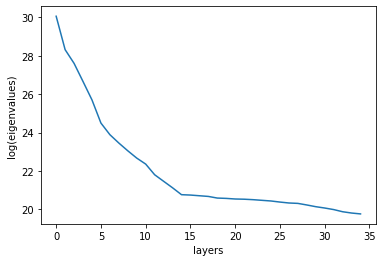

In [7]:
test_mul_comb(mul_comb,pc, pca_comp)

We see around 5-10 pc components.

In [10]:
pt = Plotting()

## Processing PCA

In [11]:
intensity, pca_results = process_pca(data1Ds, pc, num, pca_comp)

========= Intensity ==============


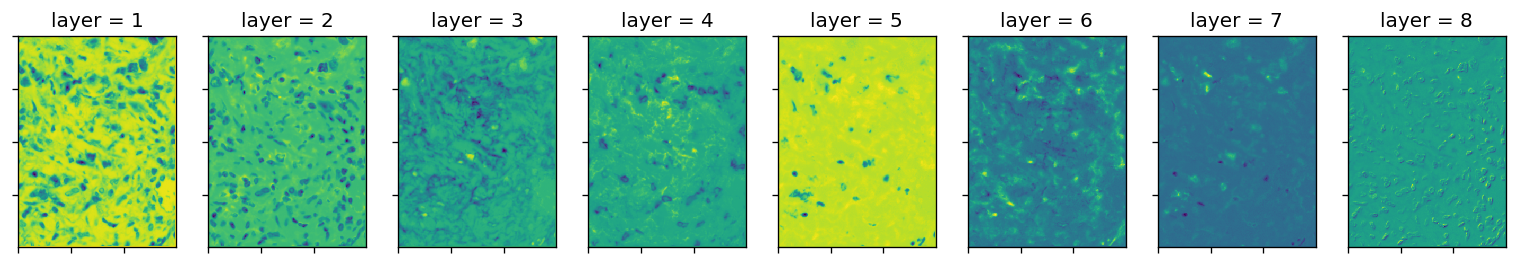

In [12]:
idx = 2
pt.plot_pca_data(pca_results[pixel*idx:pixel*(idx+1), :].T)

## Process Intensity

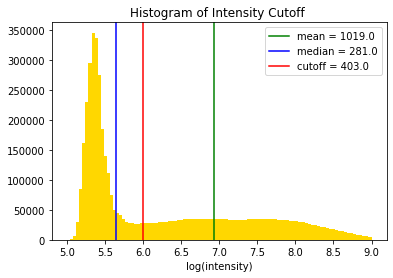

In [13]:
cutoffH,_,_ = get_intensity_hist(intensity, cutoff_log = 6, range = (5,9))

In [14]:
stream_1D, norm_data, mask = process_intensity(pca_results, intensity, cutoffH, base, pca_comp)

norm length 2111704
norm_data -0.9995148497417065 0.5559351436146849
rebin, min/mac 0.0 6.0


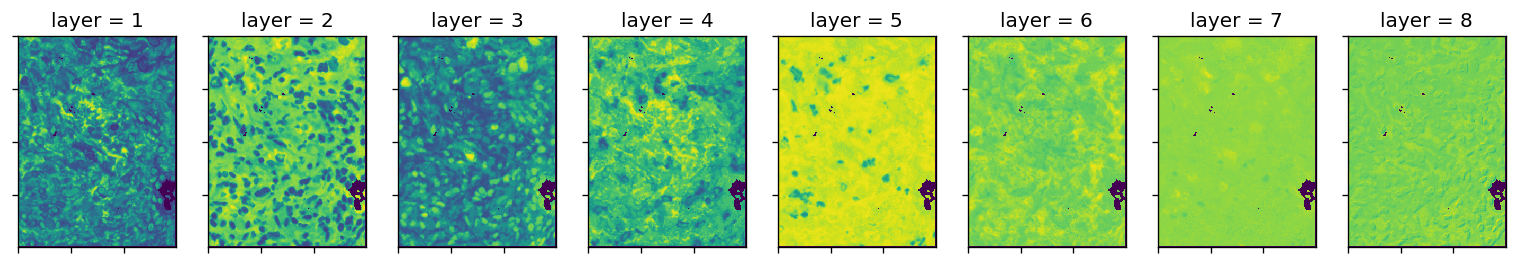

In [15]:
_ = pt.test_norm(norm_data,mask, idx = 2, bg = -1.1 )

rebin, min/mac 0.0 6.0


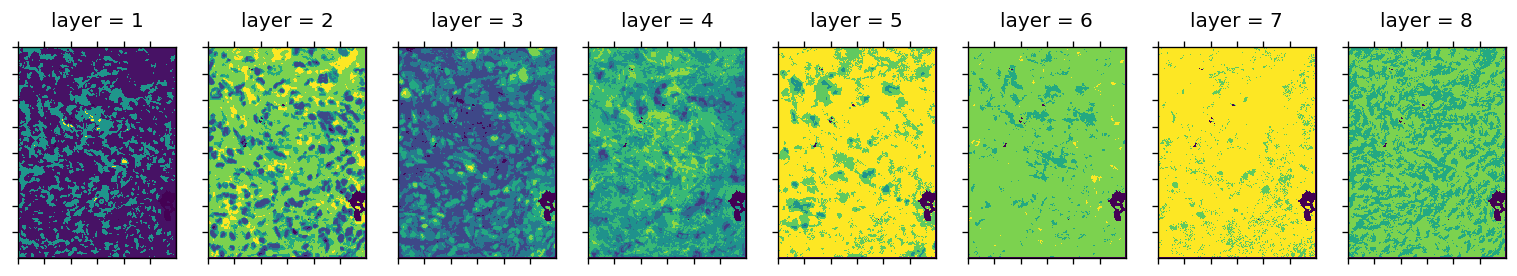

In [16]:
masked_rebin = pt.test_rebin(norm_data,mask, idx = 2 )

## Counting Heavy Hitters Traditionally

In [19]:
exact_pdh = process_stream_1D(stream_1D, base, pca_comp, topk = 10000, percentage = 0.01)

498.75
#exact_pdh 604 498.75
        0    1    2    3    4    5    6    7   freq       val
0     0.0  5.0  4.0  4.0  4.0  3.0  3.0  4.0  49875   9292072
1     0.0  5.0  3.0  3.0  4.0  4.0  3.0  4.0  39918   9324264
2     0.0  5.0  4.0  3.0  4.0  4.0  3.0  4.0  32220   9324328
3     0.0  4.0  3.0  3.0  4.0  4.0  3.0  4.0  28804   9324256
4     0.0  4.0  3.0  4.0  3.0  3.0  3.0  4.0  28127   9287904
...   ...  ...  ...  ...  ...  ...  ...  ...    ...       ...
2171  0.0  4.0  5.0  3.0  3.0  3.0  3.0  4.0      1   9287520
2172  1.0  4.0  1.0  6.0  4.0  3.0  3.0  4.0      1   9292897
2173  0.0  3.0  3.0  4.0  4.0  4.0  4.0  5.0      1  11684056
2174  0.0  3.0  2.0  5.0  4.0  4.0  3.0  3.0      1   7228056
2175  0.0  5.0  3.0  5.0  4.0  4.0  3.0  4.0      1   9325288

[2176 rows x 10 columns]


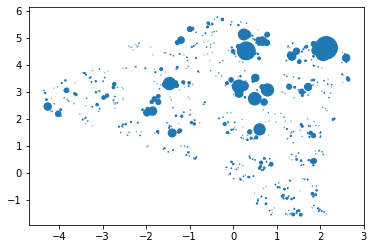

In [20]:
umap_result = process_umap(exact_pdh, pca_comp)

In [33]:
exact_pdh['umap1'] = umap_result[:,0] 
exact_pdh['umap2'] = umap_result[:,1]
np.savetxt(f'{name}/exact_pdh.cvs', exact_pdh)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 604 samples in 0.003s...
[t-SNE] Computed neighbors for 604 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 604 / 604
[t-SNE] Mean sigma: 0.807292
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.453415
[t-SNE] KL divergence after 300 iterations: 1.221181


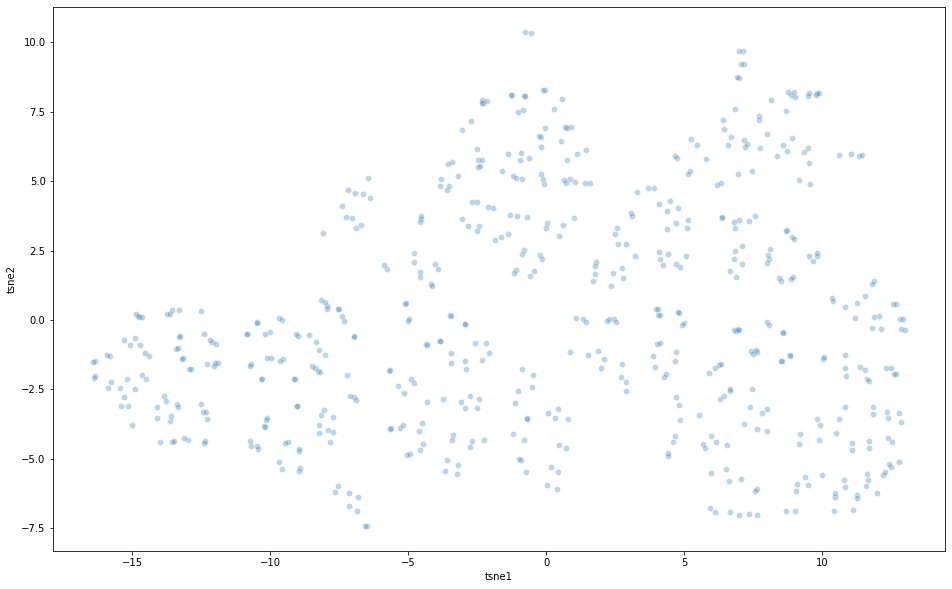

In [23]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(exact_pdh[range(8)])
exact_pdh['tsne1'] = tsne_results[:,0]
exact_pdh['tsne2'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
#     hue="y",
    palette=sns.color_palette("hls", 10),
    data=exact_pdh,
    legend="full",
    alpha=0.3
)
# np.savetxt(f'{name}/exact_pdh', exact_pdh)

In [30]:
np.savetxt(f'{name}/exact_pdh.cvs', exact_pdh)

In [34]:
exact_pdh

,0,1,2,3,4,5,6,7,freq,val,tsne1,tsne2,umap1,umap2
0,0.0,5.0,4.0,4.0,4.0,3.0,3.0,4.0,49875,9292072,0.662207,6.933865,2.137442,4.643128
1,0.0,5.0,3.0,3.0,4.0,4.0,3.0,4.0,39918,9324264,4.414155,2.363371,0.300189,4.528263
2,0.0,5.0,4.0,3.0,4.0,4.0,3.0,4.0,32220,9324328,-0.059133,6.902949,2.069102,4.433572
3,0.0,4.0,3.0,3.0,4.0,4.0,3.0,4.0,28804,9324256,2.732023,1.886606,0.127822,3.213155
4,0.0,4.0,3.0,4.0,3.0,3.0,3.0,4.0,28127,9287904,1.513563,-1.275393,0.493779,2.758986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0.0,5.0,2.0,2.0,3.0,3.0,3.0,4.0,519,9286824,6.948108,5.239769,-0.675225,4.387440
600,0.0,2.0,2.0,4.0,3.0,4.0,3.0,4.0,513,9320592,-6.975287,-0.604796,-1.014871,0.947287
601,0.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,508,7227232,-3.042547,6.825539,2.182463,3.480692
602,0.0,3.0,3.0,4.0,2.0,3.0,3.0,4.0,505,9283800,-2.260043,-4.317291,0.735476,1.904702
